基于mnist数据集，建立mlp模型，实现0-9数字的十分类task：：

1.实现mnist数据载入，可视化图形数字
2.完成数据预处理：图像数据维度转换与归一化、输出结果格式转换
3.计算模型在预测数据集的准确率
4.模型结构：两层隐藏层，每层有392个神经元

In [1]:
#load minst data
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [2]:
print(type(x_train),x_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


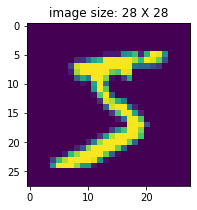

In [3]:
#visual data
img1 = x_train[0]
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title('image size: 28 X 28')
plt.show()

In [4]:
img1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
#format input data
feature_size = img1.shape[0]*img1.shape[1]
x_train_format = x_train.reshape(x_train.shape[0],feature_size)
x_test_format = x_test.reshape(x_test.shape[0],feature_size)
print(x_train_format.shape)

(60000, 784)


In [8]:
#normalize the input data
x_train_normal = x_train_format/255
x_test_normal = x_test_format/255
print(x_train_normal[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [9]:
#format the output data(labels)
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train_format[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
#set up the model
from keras.models import Sequential
from keras.layers import Dense, Activation

mlp = Sequential()
mlp.add(Dense(units=392,activation='sigmoid',input_dim=feature_size))
mlp.add(Dense(units=392,activation='sigmoid'))
mlp.add(Dense(units=10,activation='softmax'))
mlp.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 392)               307720    
_________________________________________________________________
dense_1 (Dense)              (None, 392)               154056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3930      
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [11]:
#configure the model
mlp.compile(loss='categorical_crossentropy',optimizer='adam')
#train the model
mlp.fit(x_train_normal,y_train_format,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3448
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1440
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0934
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0650
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0485
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0364
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0262
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0224
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0162
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0127


In [16]:
#evaluate the model
y_train_predict = mlp.predict_classes(x_train_normal)
print(type(y_train_predict))
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)
y_test_predict = mlp.predict_classes(x_test_normal)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

<class 'numpy.ndarray'>
0.9972333333333333
0.982


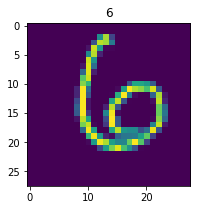

In [17]:
img2 = x_test[100]
fig2 = plt.figure(figsize=(3,3))
plt.imshow(img2)
plt.title(y_test_predict[100])
plt.show()

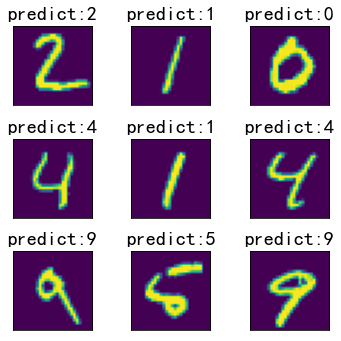

In [19]:
# coding:utf-8
import matplotlib as mlp
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size'   : 20,
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
a = [i for i in range(1,10)]
fig4 = plt.figure(figsize=(5,5))
for i in a:
    plt.subplot(3,3,i)
    plt.tight_layout()
    plt.imshow(x_test[i])
    plt.title('predict:{}'.format(y_test_predict[i]),font2)
    plt.xticks([])
    plt.yticks([])